In [32]:
import random

num_city = 100
num_air = 3
cities = set()
airports = []

for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

<module 'matplotlib.pyplot' from '/home/jmoon/.conda/envs/mlenv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

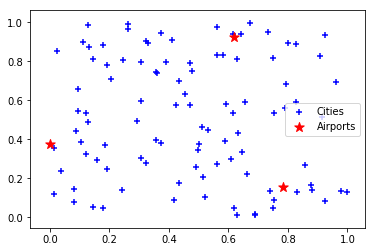

In [33]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">